# <font color=red> The goal of this project is use machine learning to create a model that predicts which passengers survived the Titanic shipwreck </font>

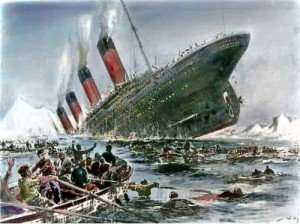

In [1]:
from IPython.display import Image
Image("titanic.jpg")

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, make_scorer
%matplotlib inline

In [3]:
#Importing dataset
df= pd.read_csv("titanic.csv")

## 1. Exploratory Data Analysis

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## <font color=black> Variable Description </font>
- PassengerId: <font color=black> passenger's **ID** </font> 
- Survived: <font color=black> **0** </font>= No, <font color=black> **1** </font>= Yes
- PClass: Passenger Class=<font color=black> (1=**1st**. 2=**2nd**,3=**3rd**) </font>
- Name: <font color=black> passenger's **name** </font> 
- Sex: <font color=black> passenger's **sex** </font> 
- Age: <font color=black> passenger's **age** </font> 
- SibSp: <font color=black> **number** of Siblings/Spouses Aboard </font> 
- Parch: <font color=black> **number** of Parents/Children Aboard </font>
- Ticket: <font color=black> **Ticket number** </font> 
- Fare: <font color=black> **Passenger Fare** (British pound) </font> 
- Cabin: <font color=black> **Cabin ID** </font> 
- Embarked: <font color=black> **Port of Embarkation** </font> C=Cherbourg, Q=Queenstown, S=Southampton

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Data Visualization

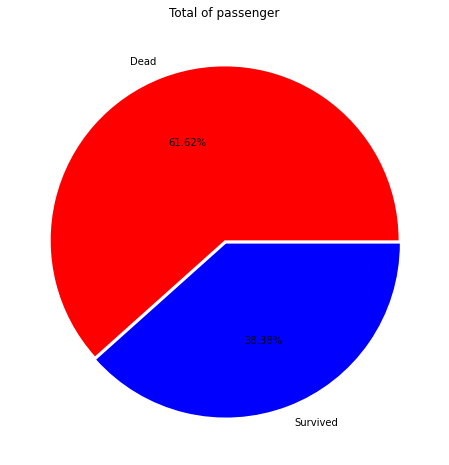

In [8]:
#Survived and dead
plt.figure(figsize=(8,8))
plt.pie(df["Survived"].value_counts(), colors=["red", "blue"], labels=["Dead","Survived"], autopct='%.2f%%', explode=[0,0.02] )
plt.title("Total of passenger");

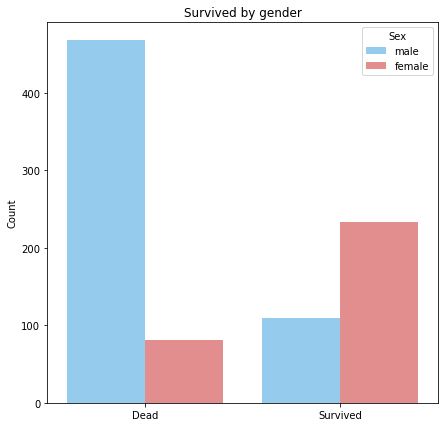

In [9]:
#Gender analysis
plt.figure(figsize=(7,7))
gender_colors = ['lightskyblue', 'lightcoral']
plt.title("Survived by gender")
x=sns.countplot(data=df, x="Survived", hue='Sex', palette=gender_colors)
plt.xticks([0,1],["Dead", "Survived"])
x.set(xlabel=None, ylabel="Count");

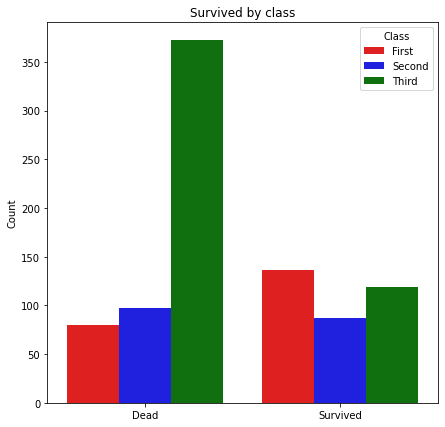

In [10]:
#Class Analysis
plt.figure(figsize=(7,7))
colors = ['red', 'blue', 'green']
plt.title("Survived by class")
y=sns.countplot(data=df, x="Survived", hue='Pclass', palette=colors)
plt.xticks([0,1],["Dead", "Survived"])
plt.legend(title="Class", loc="upper right", labels=["First","Second", "Third"])
y.set(xlabel=None,ylabel="Count");

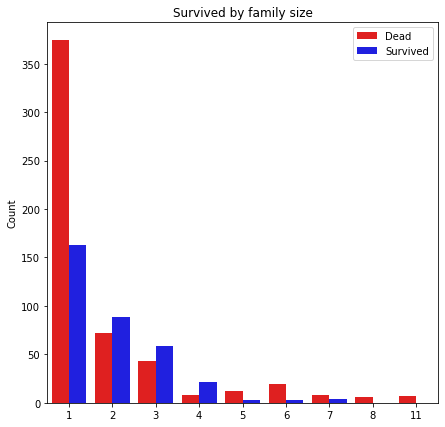

In [11]:
#Family size analysis
df["Family_size"]=df['SibSp']+df['Parch']+1
f_colors = ['red', 'blue']
plt.figure(figsize=(7,7))
plt.title("Survived by family size")
y=sns.countplot(data=df, x="Family_size", hue='Survived', palette=f_colors)
plt.legend(loc="upper right", labels=["Dead","Survived"])
y.set(xlabel=None,ylabel="Count");

In [12]:
df.drop(["Family_size"], axis=1, inplace=True)

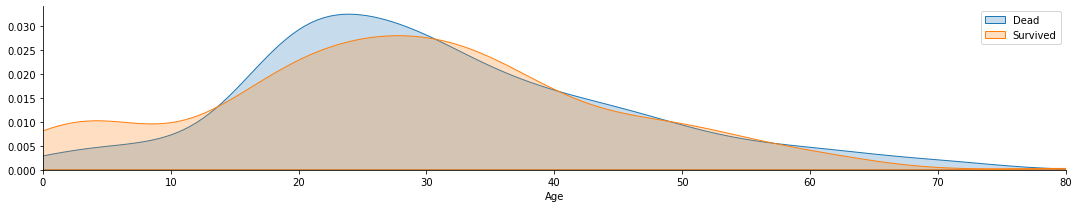

In [13]:
#Age analysis
facet = sns.FacetGrid(df, hue="Survived", aspect=5)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, df["Age"].max()))
plt.legend(loc="upper right", labels=["Dead","Survived"]);

## 3. Data Preprocessing

In [14]:
#Removal non-significant variables
df.drop(["PassengerId","Name","Ticket","Cabin"], axis=1, inplace=True)

In [15]:
#Checking for null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [16]:
#Fill the null values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode() [0], inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
#Convert categorical data into numerical data.

In [18]:
df = pd.get_dummies(df, columns=['Embarked','Pclass'])

In [19]:
df = pd.get_dummies(df, columns=['Sex'],drop_first=True)

In [20]:
#Variable standardization

In [21]:
Ss = StandardScaler()
df[['Age','Fare','SibSp','Parch']] = Ss.fit_transform(df[['Age','Fare','SibSp','Parch']])

In [22]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,-0.565736,0.432793,-0.473674,-0.502445,0,0,1,0,0,1,1
1,1,0.663861,0.432793,-0.473674,0.786845,1,0,0,1,0,0,0
2,1,-0.258337,-0.474545,-0.473674,-0.488854,0,0,1,0,0,1,0
3,1,0.433312,0.432793,-0.473674,0.420730,0,0,1,1,0,0,0
4,0,0.433312,-0.474545,-0.473674,-0.486337,0,0,1,0,0,1,1


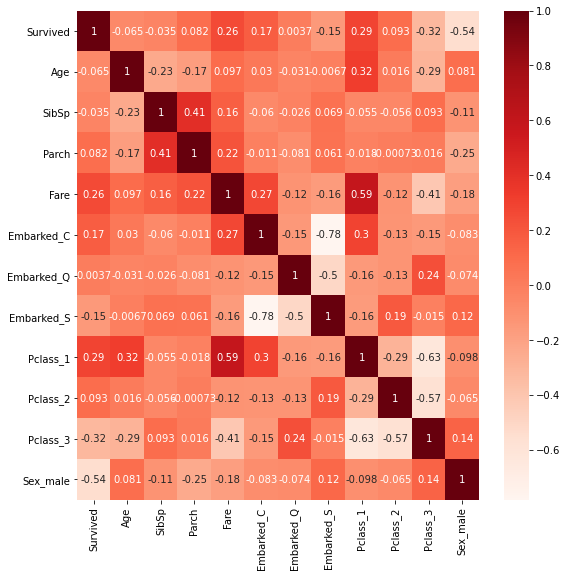

In [23]:
#Plotting Heatmap
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap="Reds");

In [24]:
#Train-Test Split

In [25]:
X= df.loc[:, df.columns != 'Survived'].values
y= df.loc[:, df.columns == 'Survived'].values.squeeze()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [27]:
#Label balance control
print(np.bincount(y_train)/len(y_train), np.bincount(y_test)/len(y_test))

[0.62359551 0.37640449] [0.58659218 0.41340782]


## 4. Building Models

### <font color=blue> 4.1 Decision tree </font>

In [53]:
#Model selection on Validation set
score_fnc= balanced_accuracy_score
param_grid= {"max_depth":np.logspace(0.5, 2, 20).astype(int),"min_samples_leaf":np.logspace(0.5, 1.5, 10).astype(int)}

val_cv= KFold(n_splits=5)
model = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
model_selection= GridSearchCV(estimator=model, param_grid=param_grid , scoring=make_scorer(score_fnc), cv=val_cv)
model_selection.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': array([  3,   3,   4,   5,   6,   7,   9,  11,  13,  16,  19,  23,  28,
        33,  40,  48,  57,  69,  83, 100]),
                         'min_samples_leaf': array([ 3,  4,  5,  6,  8, 11, 14, 18, 24, 31])},
             scoring=make_scorer(balanced_accuracy_score))

In [54]:
#Hyperparameters chosen
model_selection.best_params_, model_selection.best_score_

({'max_depth': 3, 'min_samples_leaf': 3}, 0.8010156526122859)

In [55]:
#Prediction on Test set
models={}
Tree=DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, criterion='entropy', class_weight='balanced')
Tree.fit(X_train,y_train)
prediction=Tree.predict(X_test)
result=balanced_accuracy_score(prediction,y_test)
Decision_Tree = {'Decision_Tree':result}
models.update(Decision_Tree)

### <font color=blue> 4.2 K-Nearest Neighbours </font>

In [56]:
#Model selection on Validation set
param_grid= {"n_neighbors":np.arange(1,20)}

val_cv= KFold(n_splits=5)
model = KNeighborsClassifier()
model_selection= GridSearchCV(estimator=model, param_grid=param_grid , scoring=make_scorer(score_fnc), cv=val_cv)
model_selection.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring=make_scorer(balanced_accuracy_score))

In [57]:
#Hyperparameters chosen
model_selection.best_params_, model_selection.best_score_

({'n_neighbors': 19}, 0.7695132030492313)

In [58]:
#Prediction on Test set
KNN=KNeighborsClassifier(n_neighbors=19)
KNN.fit(X_train,y_train)
prediction=KNN.predict(X_test)
result=balanced_accuracy_score(prediction,y_test)
KNNeighbors = {'KNNeighbors':result}
models.update(KNNeighbors)

### <font color=blue> 4.3 Logistic Regression </font>

In [59]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
result=balanced_accuracy_score(prediction,y_test)
LogisticR = {'LogisticR':result}
models.update(LogisticR)

In [60]:
#Confusion Matrix
print(confusion_matrix(prediction,y_test))

[[90 21]
 [15 53]]


In [61]:
#Classification Report
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       111
           1       0.72      0.78      0.75        68

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.80      0.80       179



### <font color=blue> 4.4 Support Vector Machine </font>

In [62]:
model=svm.SVC()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
result=balanced_accuracy_score(prediction,y_test)
SupportVectorM = {'SupportVectorM':result}
models.update(SupportVectorM)

In [63]:
#Confusion Matrix
print(confusion_matrix(prediction,y_test))

[[92 20]
 [13 54]]


In [64]:
#Classification Report
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       112
           1       0.73      0.81      0.77        67

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### <font color=blue> 4.5 GaussianNB </font>

In [65]:
model=GaussianNB()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
result=balanced_accuracy_score(prediction,y_test)
GaussianNaiveB = {'GaussianNaiveB':result}
models.update(GaussianNaiveB)

In [66]:
#Confusion Matrix
print(confusion_matrix(prediction,y_test))

[[83 18]
 [22 56]]


In [67]:
#Classification Report
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       101
           1       0.76      0.72      0.74        78

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [68]:
#Accuracy of models
for key, value in models.items():
    print(key, ' : ', round(value,4))

Decision_Tree  :  0.8277
KNNeighbors  :  0.8007
LogisticR  :  0.7951
SupportVectorM  :  0.8137
GaussianNaiveB  :  0.7699
